<a href="https://colab.research.google.com/github/JiiHyunK/data_distribution_python/blob/main/pearson_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

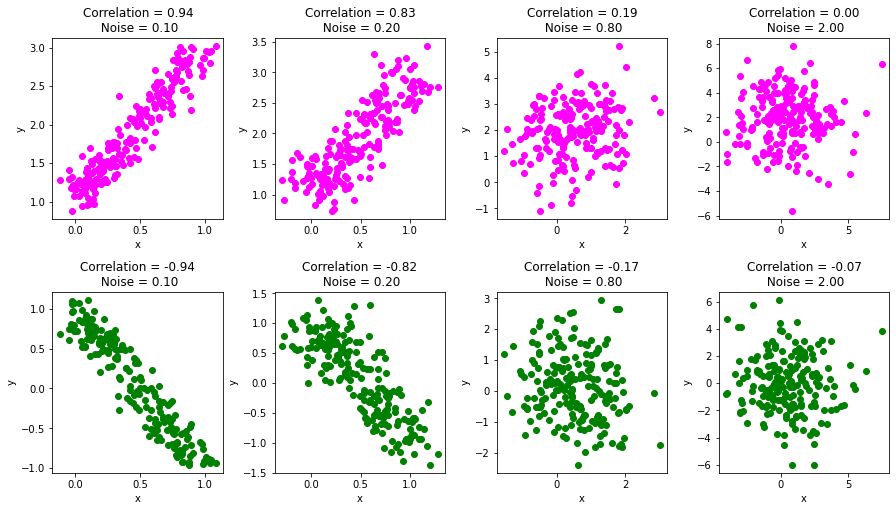

In [ ]:
import numpy as np
seed = 13
rand = np.random.RandomState(seed)
x = rand.uniform(0,1,200)
x = np.vstack((x,x*2+1))
x = np.vstack((x,-x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,200)))

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for noise, i in zip([0.5,0.2,0.8,2],[0,1,2,3]):
    # Add noise
    x_with_noise = x+rand.normal(0,noise,x.shape)
    
    # Compute correlation
    rho_noise = np.corrcoef(x_with_noise)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1])
                        + '\n Noise = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2])
                        + '\n Noise = ' + "{:.2f}".format(noise))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()

data길이:  2500
중복체크 길이:  2423
[4, 5]
[12, 3]
[3, 20]
시간 0.0026712417602539062
skyline의 길이:  3
unique의 길이:  0
[[4, 5], [12, 3], [3, 20]]


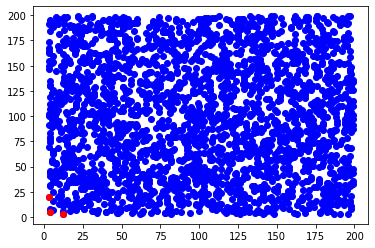

In [2]:
#pre-nn 표준 분포
#random
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time
from collections import defaultdict

Skylines =[]
data_cnt = 2500
randnum = 200


np.random.seed(4)
distance = np.random.randint(3,randnum,size=data_cnt)
prices = np.random.randint(3,randnum,size=data_cnt)
temp = zip(distance,prices)
count=0  
data = []
skyline = []
unique = []
one = defaultdict(lambda : randnum)
two = defaultdict(lambda : randnum)

for x,y in temp:
    data.append(list((x,y)))
sCandidate = {}

print("data길이: ",len(data))
#중복체크
ex_list = list(set(map(tuple,data)))
print("중복체크 길이: ",len(ex_list))



timelap = time.time()
# dominant되지 않는 tuple들을 나타내기
for x, y  in ex_list:  
    if y < one[x]:
        one[x] = y 
        if two[one[x]] > x: 
            if two[one[x]] != randnum and two[one[x]] in sCandidate:
                del sCandidate[two[one[x]]]    
            two[one[x]] = x
            sCandidate[two[one[x]]] = one[x]
        elif two[one[x]] < x: 
            if x in sCandidate:
                del sCandidate[x]   
                
for x,y in sCandidate.items():
    skyline.append([x,y])
# print("개수: ", len(skyline))

def euclidean_distance(x,y):
    return math.sqrt(x**2+y**2)

############################# NN 인덱스 반환
def boundedNNSearch(data, distance_function):
    data_distance = []
    for x, y in data:
        data_distance.append(distance_function(x, y)) # 원점과 현재 데이터의 거리 계산 후 data_distance에 append한다
    
    nn_idx = data_distance.index(min(data_distance)) # Nearest Neighbor의 인덱스를 얻는다
    return nn_idx



############################# #Region을 0, 1, 2으로 나눠주는 함수
def data_cut(data, todo, nn, region_idx):
    region = []
    for i in range(len(data)):
        x, y = data[i]

        region_dict ={0: x > nn[0] and y > nn[1], 1: y > nn[1], 2: x > nn[0]} #Region 0인지 1인지 2인지 딕셔너리
            
        if region_dict[region_idx]:
            continue
        if x != nn[0] and y != nn[1]:
            region.append(data[i])
        
    if region_idx == 0:
        return region #Region의 데이터 반환

    else:
        if len(region) != 0: 
            todo.append(region) #해야할 일에 Region의 데이터 추가


############################# 메인 함수
def getskylines(data, distance_function=euclidean_distance):
    todo = []
    skylines = []
    todo.append(data) # Todo에 데이터 추가
    del data


    #### Todo 만큼 반복. Todo를 추가하면 추가된Todo 실행
    for i, region in enumerate(todo): #n
        nn = region[boundedNNSearch(region, distance_function)] ## NN 구하기
        
        data = data_cut(region, todo, nn, 0) # Region 3을 제외한 데이터 반환
        data_cut(data, todo, nn, 1)  # Region 1 을 todo에 추가
        data_cut(data, todo, nn, 2) # Region 2 todo에 추가

        skylines.append(nn) #스카이라인 추가
        print(nn)

        todo[i] = None # 필요없는 변수 없애기
    return skylines

answer = getskylines(skyline)
print("시간",time.time()-timelap)
print("skyline의 길이: ",len(answer))
print("unique의 길이: ",len(unique))
# print(ex_list, end = "\n\n")
print(answer)
skyline = np.array(answer)
plt.scatter(distance,prices, color="blue")
plt.scatter(skyline[:,0], skyline[:,1], color="red", label="sCandidate")
# plt.xlim(0, 10) 
# plt.ylim(0, 10)
plt.show()


In [4]:
from scipy import linspace
from scipy import pi,sqrt,exp
from scipy.special import erf
import seaborn as sns
import matplotlib.pyplot as plt


from pylab import plot,show
a=np.random.normal(0,2)
plt.
sns.displot(a)
# def pdf(x):
#     return 1/sqrt(2*pi) * exp(-x**2/2)

# def cdf(x):
#     return (1 + erf(x/sqrt(2))) / 2

# def skew(x,e=0,w=1,a=0):
#     t = (x-e) / w
#     return 2 / w * pdf(t) * cdf(a*t)
#     # You can of course use the scipy.stats.norm versions
#     # return 2 * norm.pdf(t) * norm.cdf(a*t)


# n = 10
# e = 1.0 # location
# w = 2.0 # scale
# np.randnum.
# x = linspace(-5,5,n)
# # skew() 
# y= linspace (-50,50,n)
# p1=skew(x,e,1,-2)
# p2=skew(y,e,w,0)

# plt.plot(p1)
# plt.plot(p2)
# # for a in range(-3,4):
# #     p = skew(x,e,w,a)
# #     plot(x,p)

# # show()
# import seaborn as sns
# sns.jointplot(x=p1,y=p2)

TypeError: ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


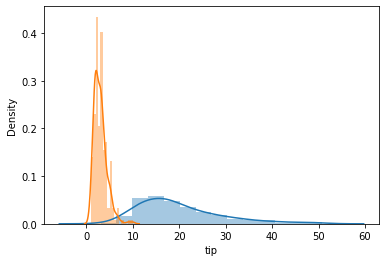

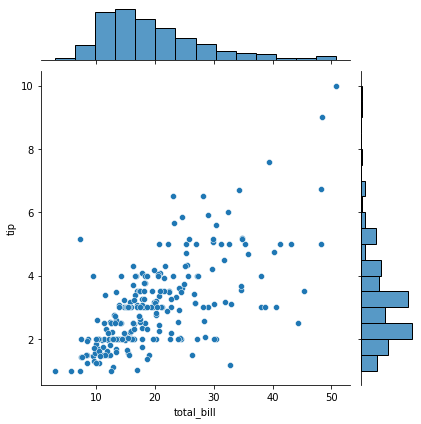

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

tips = sns.load_dataset('tips')
print(tips.info())
sns.distplot(tips['total_bill'])
sns.distplot(tips['tip'])
sns.jointplot(x='total_bill',y='tip',data=tips)


In [ ]:
s